# Coding Temple's Data Analytics Program
---
## Intro to API's Assignment
---
### Problem 1:
Check out this Pokemon API https://pokeapi.co/
Use the requests package to connect to this API and get and store data for 5 different pokemon.
Get the pokemons: name, atleast one ability's name, base_experience, and the URL for its sprite (an image that shows up on screen) for the 'front_shiny', attack base_state, hp base_stat, defense base_stat

**BONUS POINTS IF YOU CAN POPULATE THE IMAGE!**

In [2]:
import requests, json


In [387]:
#my main goal is to get to gen 3 pokemon to reach Sapphire,Ruby and Emerald pokemon
# url =r'https://pokeapi.co/api/v2/generation/'
# response =requests.get(url)
# # response.json()
new_url=r'https://pokeapi.co/api/v2/generation/3/'
response2= requests.get(new_url)
# print(response2.json()['pokemon_species'][132])
poketest_url = r'https://pokeapi.co/api/v2/pokemon/seedot'
response4=requests.get(poketest_url)
response4.json()['held_items'][0]['version_details'][-1]['rarity']




5

hariyama
120
166


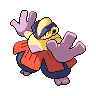

In [359]:
import numpy as np
from PIL import Image
from io import BytesIO

class Pull_rand_gen3_poke:
    """
    This object is to create attributes using information pulled from the Pokemon api, exclusively using
    the 3rd generation of Pokemon. It however, can not pull deoxys in its current state. But will detect if deoxys is put in.
    It will have a name, random ability, base experience, a url for its front shiny sprite,
    an attack base stat, a base hp stat, and a base defense stat. It will also be able to show in python
    the image associated with its front shiny sprite when called.
    
    The attributes for this class:
        -Pokename: the Pokemon's name.
        -Gen3Info: the request file using the pokemon names to directly link into the api.
        -Ability: Picks a random ability the Pokemon can have.
        -Base Experience: Tells the base experience of that Pokemon.
        -Shiny URL Front: The url for the image of the shiny front sprite.
        -Attack Base Stat: The base attack stat of that Pokemon
        -HP Base Stat: The base HP stat of that Pokemon.
        -Defense Base Stat: The base defense stat of that Pokemon.
    The method for this class is:
        -Show Image: returns an image of the Shiny Url Front attribute.
    
    """
    def __init__(self,poke_name=f'{response2.json()["pokemon_species"][(np.random.randint(0,132))]["name"]}'):
        try:
            self.poke_name= poke_name
            self.gen3_info=requests.get(fr'https://pokeapi.co/api/v2/pokemon/{self.poke_name}')
            self.ability = self.gen3_info.json()['abilities'][(np.random.randint(len(self.gen3_info.json()['abilities'])))]['ability']['name']
            self.base_experience=self.gen3_info.json()['base_experience']
            self.shiny_url_front=fr'{self.gen3_info.json()["sprites"]["front_shiny"]}'
            self.attack_base_stat=self.gen3_info.json()['stats'][1]['base_stat']
            self.hp_base_stat=self.gen3_info.json()['stats'][0]['base_stat']
            self.defense_base_stat=self.gen3_info.json()['stats'][2]['base_stat']
        except:
            print('Unable to pull deoxys.')
            
        
    def show_image(self):
        return Image.open(BytesIO((requests.get(self.shiny_url_front)).content))
        
Pokemon1 = Pull_rand_gen3_poke()
print(Pokemon1.poke_name)
print(Pokemon1.attack_base_stat)
print(Pokemon1.base_experience)
Pokemon1.show_image()


### Problem 2:

I want to build the best Pokemon team I can and I need your help to do so! Using the API, build me a team of 6 pokemon who's base-stats are above 60. Return any additional information you think is needed to help understand why you chose that pokemon for the team!

In [358]:
def build_a_team(pokemon_list:list):
    """
    This function runs through a list of given Pokemon until it returns a dictionary 
    that is filled with a team of 6 pokemon and their unique typings.
    
    It creates a copy of the original list it can iterate through, then creates a dictionary and temp list.
    Then it starts a loop that waits until the length of the dictionary is 6. Then it randomly pops a Pokemon out of the copied list 
    and checks if any pokemon currently on the team have the same type as the popped Pokemon. If not, the pokemon is added to the team.
    """
    pk_list=pokemon_list[:]
    team = {}
    team_types=[]
    while len(team) < 6:
        pokemon_tryout = pk_list.pop(np.random.randint(0,(len(pk_list))))
        tryout_info = requests.get(fr'https://pokeapi.co/api/v2/pokemon/{pokemon_tryout}')
        test_type=[tryout_info.json()['types'][i]['type']['name'] for i in range(len(tryout_info.json()['types']))]
        if any(type in team_types for type in test_type) == True:
            continue
        else:
            team[pokemon_tryout]=test_type
            team_types += test_type
    return team

print(build_a_team(above_sixty))

{'slaking': ['normal'], 'rayquaza': ['dragon', 'flying'], 'sceptile': ['grass'], 'kyogre': ['water'], 'blaziken': ['fire', 'fighting'], 'gardevoir': ['psychic', 'fairy']}


### Problem 3:

Create a function that does the following:
* Input: pokemon_name(user_defined) -> str
* Output: list object containing a dictionary of values from the response object.
* Please include the type, the most current raritey level, at least one held item, and all stats

In [397]:
def poke_info(pokemon:str):
    '''
    This functions takes in a pokemon names as a string and returns a list
    with nested dictionaries for its name, typings, base stats, and a random held item and its rarity.
    '''
    p_req=requests.get(fr'https://pokeapi.co/api/v2/pokemon/{pokemon.lower()}')
    typings={'type(s)':[p_req.json()['types'][i]['type']['name'] for i in range(len(p_req.json()['types']))]}
    # The list comprehension is to check if the pokemon has two types, and if so,
    #  then add them in.
    stats={"base_stats":{}}
    for i in range(6):
        stats["base_stats"][f"{p_req.json()['stats'][i]['stat']['name']}"] = p_req.json()['stats'][i]['base_stat']
    # Initializes the dictionary then does a for loop for all 6 stats to add each unique stat
    #  into the nested dictionary.
    rand_held_num = np.random.randint(len(p_req.json()['held_items']))
    held_item={'held_item':f"{p_req.json()['held_items'][rand_held_num]['item']['name']}"}
    held_item['rarity']= f"{p_req.json()['held_items'][rand_held_num]['version_details'][-1]['rarity']}"
    # Picks a random number from the possible held items, then pulls that items name into the held item
    #  dictionary. Then creates the rarity key, the value is set to the last place in the list of rarities
    #  to get the latest pokemon games rarity level.
    return [{'name': f'{pokemon.lower()}'}, typings, stats, held_item]
poke_info('arbok')

[{'name': 'arbok'},
 {'type(s)': ['poison']},
 {'base_stats': {'hp': 60,
   'attack': 95,
   'defense': 69,
   'special-attack': 65,
   'special-defense': 79,
   'speed': 80}},
 {'held_item': 'poison-barb', 'rarity': '5'}]